In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import read_classification_dataset, features_histograms_mean_std
# import sklearn
from sklearnex import patch_sklearn
from sklearn.calibration import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report


import joblib

from kneed import KneeLocator

patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [9]:
train, target, test = read_classification_dataset(1)
from collections import Counter

Counter(train.values.ravel())

Counter({1.0: 31089,
         1.99690551069567: 64,
         1.98574074105007: 63,
         2.1296898921993: 60,
         2.16787830529805: 59,
         2.02893707707068: 59,
         2.08682235709906: 59,
         1.56502092834529: 57,
         2.17661209999187: 56,
         1.85033985458348: 56,
         2.12257627505719: 55,
         2.18278544208468: 55,
         2.05468964294998: 55,
         1.12221587827283: 55,
         1.29797924415936: 55,
         1.79560197989418: 53,
         2.02164403608744: 53,
         2.19840963353776: 53,
         1.82314805981069: 53,
         1.21298618473667: 53,
         1.37548071461857: 53,
         1.7965049515533: 52,
         1.37857957611577: 52,
         2.12086994017919: 52,
         1.99602982841108: 51,
         2.16004813955288: 51,
         2.1973081315031: 51,
         1.26221370547642: 51,
         1.74209640230324: 50,
         1.78153996860594: 50,
         2.06367105393072: 50,
         2.15691242570002: 49,
         2.2034680518

In [6]:
model_2 = Pipeline([
      ('Scaler', StandardScaler()),
      ('Imputer', KNNImputer()),
      ('PCA', PCA(n_components=18)),
      ('KNN', KNeighborsClassifier())
    ])

param_grid_2 = [
    {
        "Imputer": [KNNImputer(weights='distance')],
        "Imputer__n_neighbors":[1,3,7,21],
        "KNN__n_neighbors":[1,3,7,21],
        "KNN": [KNeighborsClassifier(weights="distance", n_jobs=-1)]
    },
]
grid_2 = GridSearchCV(model_2, param_grid_2, scoring="f1_weighted")
X, y = train.values, target.values.flatten()
grid_2.fit(X, y)
print(grid_2.best_score_)
print(grid_2.best_params_)
best_model_2 = grid_2.best_estimator_


c:\Users\Morri\Documents\Notebooks\ML\Project
0.8278571428571428
{'Imputer': KNNImputer(weights='distance'), 'Imputer__n_neighbors': 1, 'KNN': KNeighborsClassifier(n_jobs=-1, weights='distance'), 'KNN__n_neighbors': 7}


In [16]:
res = grid_2.cv_results_
param_scores = list((zip(res["rank_test_score"],res["mean_test_score"],res["params"], )))
param_scores.sort(key=lambda x: x[0])
param_scores

[(1,
  0.8278571428571428,
  {'Imputer': KNNImputer(weights='distance'),
   'Imputer__n_neighbors': 1,
   'KNN': KNeighborsClassifier(n_jobs=-1, weights='distance'),
   'KNN__n_neighbors': 7}),
 (2,
  0.8158571428571427,
  {'Imputer': KNNImputer(weights='distance'),
   'Imputer__n_neighbors': 21,
   'KNN': KNeighborsClassifier(n_jobs=-1, weights='distance'),
   'KNN__n_neighbors': 7}),
 (3,
  0.7997142857142857,
  {'Imputer': KNNImputer(weights='distance'),
   'Imputer__n_neighbors': 1,
   'KNN': KNeighborsClassifier(n_jobs=-1, weights='distance'),
   'KNN__n_neighbors': 3}),
 (4,
  0.7900476190476191,
  {'Imputer': KNNImputer(weights='distance'),
   'Imputer__n_neighbors': 7,
   'KNN': KNeighborsClassifier(n_jobs=-1, weights='distance'),
   'KNN__n_neighbors': 3}),
 (5,
  0.7877142857142856,
  {'Imputer': KNNImputer(weights='distance'),
   'Imputer__n_neighbors': 3,
   'KNN': KNeighborsClassifier(n_jobs=-1, weights='distance'),
   'KNN__n_neighbors': 3}),
 (6,
  0.7862380952380952,
  

In [27]:
best_model_path = './models/c_2_Scale_KNNI(1)_PCA(18)_KNN(7).pkl'
joblib.dump(grid_2.best_estimator_, best_model_path)
best_model = joblib.load(best_model_path)
pred = best_model.predict(X)
print(classification_report(y, pred))
fig = ConfusionMatrixDisplay.from_predictions(y, pred)

['./models/c_2_Scale_KNNI(1)_PCA(18)_KNN(7).pkl']

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         8

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



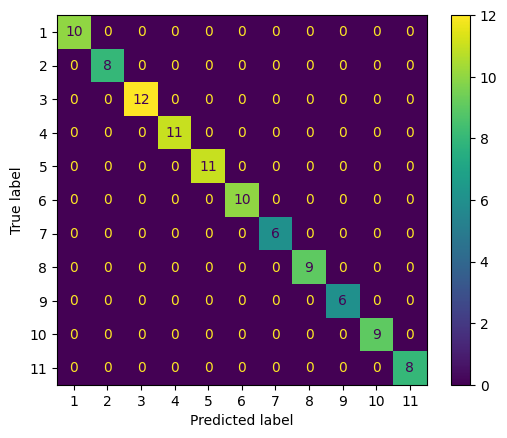